In [22]:
import tweepy
import csv
import numpy as np
from textblob import TextBlob
from keras.models import Sequential
from keras.layers import Dense, LSTM
np.random.seed(7)
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#Step 1 - Insert your API keys
consumer_key= 'ki0QBNl4YVbnQ7GjD4uNl4tuu'
consumer_secret= 'Yw5gPZ1eR16wkxiwWe2G4r5K6w9XrHMQtxwhooJAXLiHK3P3wP'
access_token= '4663203914-NWLhJGCOaiOlyfjU4GZzoARVI4LZv1jqTBnSLEo'
access_token_secret= 'aln6w2Rjdbm9UmTon8NmI2ODxdw38JzeB4UEFh54L2r3Q'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#Step 2 - Search for your company name on Twitter
public_tweets = api.search('Tesla')

#Step 3 - Define a threshold for each sentiment to classify each
#as positive or negative. If the majority of tweets you've collected are positive
#then use your neural network to predict a future price
#Defining a threshold for each sentiment
threshold=0
pos_sent_tweet=0
neg_sent_tweet=0
for tweet in public_tweets:
    #print(tweet.text)
    analysis = TextBlob(tweet.text)
    if analysis.sentiment.polarity>= threshold:
        pos_sent_tweet=pos_sent_tweet+1
    else:
        neg_sent_tweet=neg_sent_tweet+1
if pos_sent_tweet>neg_sent_tweet:
    print "Overall Positive"
else:
    print "Overall Negative"

Overall Positive


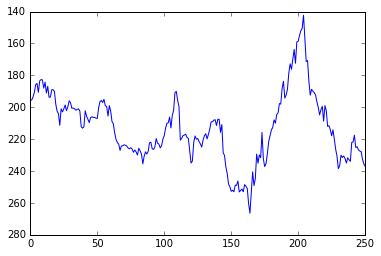

In [25]:
#data collection
dates = []
prices = []

def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

#Step 5 reference your CSV file here
get_data('tsla.csv')
plt.plot(prices)
plt.gca().invert_yaxis() #prices shown in correct order
plt.show()

#Step 6 In this function, build your neural network using Keras, train it, then predict the price
#on a given day. We'll later print the price out to terminal.
#def predict_prices(dates, prices, x):
    
#predicted_price = predict_price(dates, prices, 29)
#print(predicted_price)

In [27]:
def create_datasets(dates,prices):
    train_size=int(0.80*len(dates))
    TrainX,TrainY=[],[]
    TestX,TestY=[],[]
    cntr=0
    for date in dates:
        if cntr<train_size:
            TrainX.append(date)
        else:
            TestX.append(date)
    for price in prices:
        if cntr<train_size:
            TrainY.append(price)
        else:
            TestY.append(price)
        
    return TrainX,TrainY,TestX,TestY

def predict_prices(dates,prices,x):
    TrainX,TrainY,TestX,TestY=create_datasets(dates,prices)
    
    TrainX=np.reshape(TrainX,(len(TrainX),1))
    TrainY=np.reshape(TrainY,(len(TrainY),1))
    TestX=np.reshape(TestX,(len(TestX),1))
    TestY=np.reshape(TestY,(len(TestY),1))
    
    for i in range(251):
        print TrainX[i],TrainY[i],'\n'
        
    model=Sequential()
    model.add(Dense(32,input_dim=1,init='uniform',activation='relu'))
    model.add(Dense(32,input_dim=1,init='uniform',activation='relu'))
    model.add(Dense(16,init='uniform',activation='relu'))
    
    model.add(Dense(1,init='uniform',activation='relu'))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
    model.fit(TrainX,TrainY,nb_epoch=100,batch_size=3,verbose=1)

In [28]:
predict_prices(dates,prices,2)

[29] [ 195.56] 

[28] [ 195.48] 

[25] [ 193.64] 

[23] [ 190.61] 

[22] [ 185.84] 

[21] [ 185.04] 

[18] [ 190.65] 

[17] [ 183.49] 

[16] [ 182.65] 

[15] [ 182.78] 

[14] [ 188.] 

[11] [ 184.24] 

[10] [ 191.05] 

[9] [ 186.88] 

[8] [ 193.79] 

[7] [ 193.59] 

[4] [ 189.] 

[3] [ 189.] 

[2] [ 190.05] 

[1] [ 198.04] 

[31] [ 202.49] 

[28] [ 204.] 

[27] [ 211.34] 

[26] [ 201.] 

[25] [ 202.9] 

[24] [ 201.] 

[21] [ 198.6] 

[20] [ 202.12] 

[19] [ 199.74] 

[18] [ 195.99] 

[17] [ 197.05] 

[14] [ 200.66] 

[13] [ 200.5] 

[12] [ 200.95] 

[11] [ 201.85] 

[10] [ 201.35] 

[7] [ 201.] 

[6] [ 202.46] 

[5] [ 212.24] 

[4] [ 213.1] 

[3] [ 212.3] 

[30] [ 202.21] 

[29] [ 205.6] 

[28] [ 207.51] 

[27] [ 209.65] 

[26] [ 206.5] 

[23] [ 205.99] 

[22] [ 206.4] 

[21] [ 206.37] 

[20] [ 206.85] 

[19] [ 207.] 

[16] [ 200.42] 

[15] [ 196.49] 

[14] [ 195.75] 

[13] [ 197.06] 

[12] [ 195.] 

[9] [ 199.09] 

[8] [ 199.55] 

[7] [ 205.5] 

[6] [ 199.02] 

[2] [ 202.33] 

[1] [ 2